In [5]:
import tensorflow as tf

In [6]:
print(tf.__version__)

2.0.0


In [7]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import optimizers,layers,models,utils
import numpy as np
import matplotlib.pyplot as plt


In [9]:
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

In [10]:
train_data.shape


(404, 13)

In [11]:
test_data.shape

(102, 13)

In [12]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [13]:
train_targets[0]

15.2

In [14]:
#Normalization
mean=train_data.mean (axis = 0)
std=train_data.std (axis = 0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [15]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [16]:
#making function because of k fold iteration
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [20]:
#K-Fold
k=4
num_val_samples=len(train_data) // k
num_of_epochs=100
all_scores=[]
all_mae_histories=[]
for i in range(k):
    print("processing fold: #",i)
    val_data=train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets=train_targets[i*num_val_samples: (i+1) * num_val_samples]
    partial_train_data=np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model=build_model()
    history=model.fit(partial_train_data, partial_train_targets, epochs=num_of_epochs, batch_size=1, verbose=0)
    val_mse,val_mae=model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mse)
    mae_history=history.history['mae']
    all_mae_histories.append(mae_history)
    

processing fold: # 0
processing fold: # 1
processing fold: # 2
processing fold: # 3


In [34]:
#Error
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_of_epochs)]

print("all folds validations error: ", all_scores)
print("mean of all validations error: ", np.mean(all_scores))
print("average_mae_history: ", average_mae_history)

all folds validations error:  [8.810385368838169, 11.722214354146825, 15.242638030854783, 13.087030101530623]
mean of all validations error:  12.2155669638426
average_mae_history:  [10.650639, 3.8057408, 3.1177144, 2.8093657, 2.6284225, 2.512351, 2.4052165, 2.3558903, 2.3225696, 2.2383256, 2.2147367, 2.16556, 2.1565132, 2.1070943, 2.0952399, 2.0628986, 2.0336423, 2.0352378, 1.99984, 1.9455115, 1.9684411, 1.9576241, 1.9251072, 1.8933394, 1.8851237, 1.8752413, 1.870333, 1.8246751, 1.8212214, 1.8450086, 1.8203659, 1.7752689, 1.7893193, 1.7736003, 1.7494826, 1.751334, 1.7316276, 1.725066, 1.7000573, 1.6999065, 1.6723127, 1.6665869, 1.6925852, 1.668604, 1.6566125, 1.6392179, 1.6416724, 1.6296645, 1.6102616, 1.5925117, 1.6361737, 1.5989833, 1.5979987, 1.5827239, 1.5500467, 1.5608712, 1.5420697, 1.5373024, 1.5344837, 1.5051103, 1.533014, 1.4713287, 1.5099758, 1.4749117, 1.4967234, 1.4733219, 1.4633391, 1.4578798, 1.4644225, 1.4621112, 1.4638029, 1.4385476, 1.4284617, 1.4235321, 1.4376771, 1.4

In [35]:
[len(x) for x in all_mae_histories]

[100, 100, 100, 100]

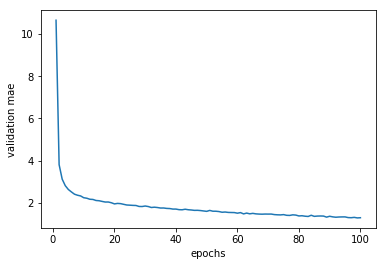

In [36]:
#Plotting Error
plt.plot(range (1, len(average_mae_history)+1 ), average_mae_history)
plt.xlabel("epochs")
plt.ylabel('validation mae')
plt.show()

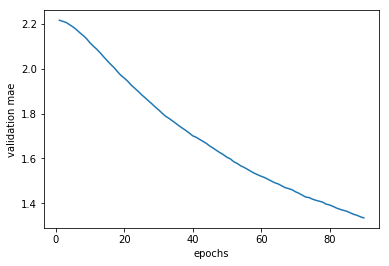

In [42]:
def smooth_curve(points, factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous * factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history=smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('epochs')
plt.ylabel("validation mae")
plt.show()


In [43]:
model=build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data, test_targets)
print(test_mae_score)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================